In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from MassProfile import MassProfile

In [ ]:
# TESTING CLASS
# radii 
r_test = np.arange(0.25, 30.5, 1.5)

In [ ]:
# Milky Way mass profile
MW = MassProfile('MW', 0, extpath='../Homework3')

In [ ]:
# calculate and compare mass profile to example
Mr_MW_halo_test = MW.MassEnclosed(1, r_test)
Mr_MW_halo_test # passed

<Quantity [0.00000000e+00, 1.26395200e+09, 4.54232750e+09, 9.20315050e+09,
           1.60363910e+10, 2.36991000e+10, 3.14803045e+10, 4.07624520e+10,
           5.26909990e+10, 6.34740895e+10, 7.57581230e+10, 8.82396490e+10,
           1.02380112e+11, 1.15651608e+11, 1.29871068e+11, 1.44169525e+11,
           1.58941964e+11, 1.73477412e+11, 1.85563953e+11, 1.98756452e+11,
           2.12659924e+11] solMass>

## Q8

In [ ]:
# mass profiles for M31 and M33
M31 = MassProfile('M31', 0, extpath='../Homework3')
M33 = MassProfile('M33', 0, extpath='../Homework3')

In [ ]:
# radii to use for the rest of the homework
r = np.arange(0.1, 30.2, 0.5)
r

array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1, 10.6,
       11.1, 11.6, 12.1, 12.6, 13.1, 13.6, 14.1, 14.6, 15.1, 15.6, 16.1,
       16.6, 17.1, 17.6, 18.1, 18.6, 19.1, 19.6, 20.1, 20.6, 21.1, 21.6,
       22.1, 22.6, 23.1, 23.6, 24.1, 24.6, 25.1, 25.6, 26.1, 26.6, 27.1,
       27.6, 28.1, 28.6, 29.1, 29.6, 30.1])

In [ ]:
# put mass profiles in a list to make life easier
m_profiles = [MW, M31, M33]

# make array to store all mass profiles in
# hierarchy: galaxy, particle type, M(r)
# for particle type: halo, disk, bulge, total
ngals = len(m_profiles)
nr = len(r)
ntypes = 4
m_encl_array = np.zeros((ngals, ntypes, nr))*u.Msun

# loop through galaxy and particle type
for i in range(ngals):
    for j in range(ntypes):

        # get mass profile
        mprof = m_profiles[i]

        if j < 3: # for specific particle types
            mr = mprof.MassEnclosed(j+1, r)
        else: # for total mass
            mr = mprof.MassEnclosedTotal(r)

        m_encl_array[i,j] = mr # save mass profile

In [8]:
# I prefer a serif font on my plots ¯\_(ツ)_/¯
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi'] = 115 # increase the resolution slightly

In [ ]:
# list of guesses for a for MW, M31, M33
a_guesses = np.array([62.2, 62.2, 25])*u.kpc

# array to store Hernquist mass profiles in
m_hern_array = np.zeros((ngals, nr))*u.Msun

# get Mhern(r) for each galaxy
for i in range(ngals):

    mprof = m_profiles[i] # get mass profile
    a = a_guesses[i] # get guess for a

    # indices of halo particles
    halo_idx = np.where(mprof.particles==1)
    # calculate total halo mass
    Mhalo = np.sum(mprof.mass[halo_idx]*1e10*u.Msun)
    # calculate Mhern(r)
    M_hern = mprof.HernquistMass(r, a=a, Mhalo=Mhalo)

    m_hern_array[i] = M_hern #save

Text(0.08, 0.5, 'Mass Enclosed $M(r)$ (M$_\\odot$)')

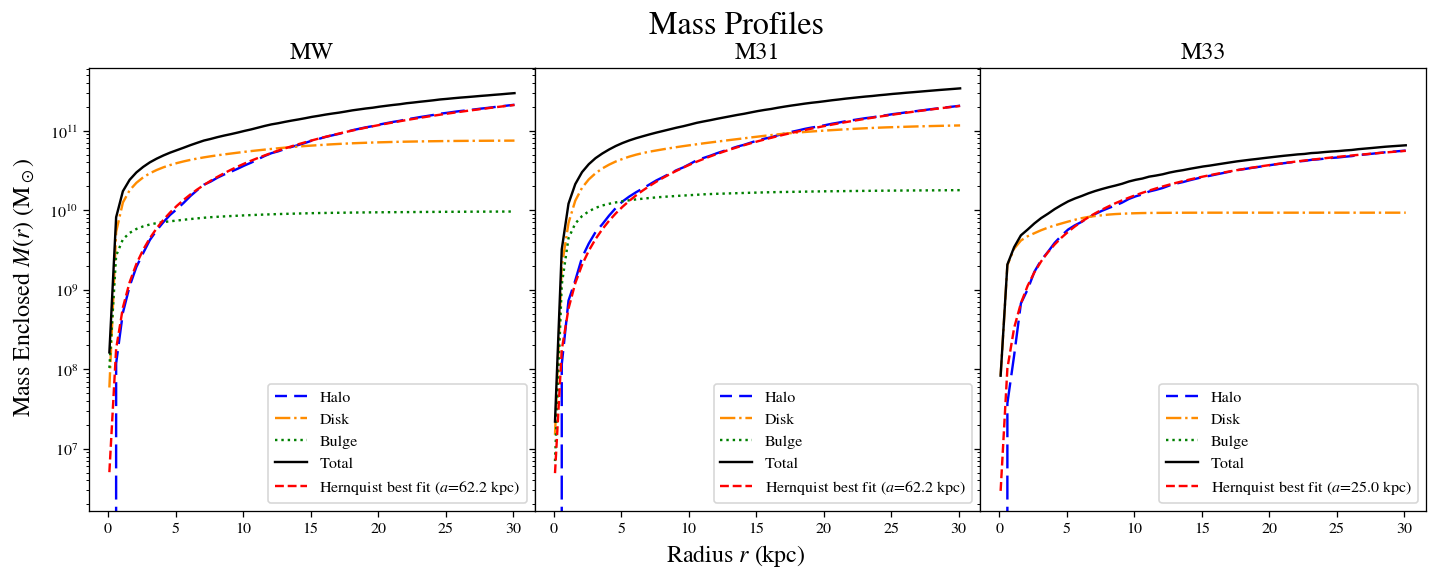

In [ ]:
# plotting the mass profiles for each galaxy
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, 
                        figsize=(15,5))

# looping through the galaxies
for i in range(ngals):

    # get the axis we need
    ax = axs[i]

    # halo mass profile
    ax.semilogy(r, m_encl_array[i,0], c='b', 
                linestyle=(5,(10,3)), label='Halo')
    # disk mass profile
    ax.semilogy(r, m_encl_array[i,1], c='darkorange', 
                linestyle='-.', label='Disk')
    # bulge mass profile
    ax.semilogy(r, m_encl_array[i,2], c='g', 
                linestyle=':', label='Bulge')
    # total mass profile
    ax.semilogy(r, m_encl_array[i,3], c='k', 
                label='Total')
    # best fit Hernquist mass profile
    ax.semilogy(r, m_hern_array[i], c='r', linestyle='--', 
                label=rf'Hernquist best fit ($a$={a_guesses[i]})')

    # title with galaxy name
    ax.set_title(m_profiles[i].gname, fontsize=15)
    ax.legend()

# make the plot look prettier and add labels & titles
fig.subplots_adjust(wspace=0)
fig.suptitle('Mass Profiles', fontsize=20)
fig.supxlabel(r'Radius $r$ (kpc)', fontsize=15)
fig.supylabel(r'Mass Enclosed $M(r)$ (M$_\odot$)', x=0.08, fontsize=15)

## Q9

In [ ]:
# array to store rotation curves for each galaxy and particle type/total
# same setup as for mass
m_vcirc_array = np.zeros((ngals, ntypes, nr))*u.km/u.s

for i in range(ngals):
    for j in range(ntypes):

        mprof = m_profiles[i]

        if j < 3: # for specific particle types
            vcirc = mprof.CircularVelocity(j+1, r)
        else: # for total rotation curve
            vcirc = mprof.CircularVelocityTotal(r)

        m_vcirc_array[i,j] = vcirc

In [ ]:
# array to store Hernquist rotation curves for each galaxy
vc_hern_array = np.zeros((ngals, nr))*u.km/u.s

for i in range(ngals):

    # get correct mass profile and a
    mprof = m_profiles[i]
    a = a_guesses[i]

    # get total halo (dark matter) mass
    halo_idx = np.where(mprof.particles==1)
    Mhalo = np.sum(mprof.mass[halo_idx]*1e10*u.Msun)
    # calculate Hernquist rotation curve
    vc_hern = mprof.HernquistVCirc(r, a=a, Mhalo=Mhalo)

    vc_hern_array[i] = vc_hern

Text(0.08, 0.5, 'Circular Velocity (km/s)')

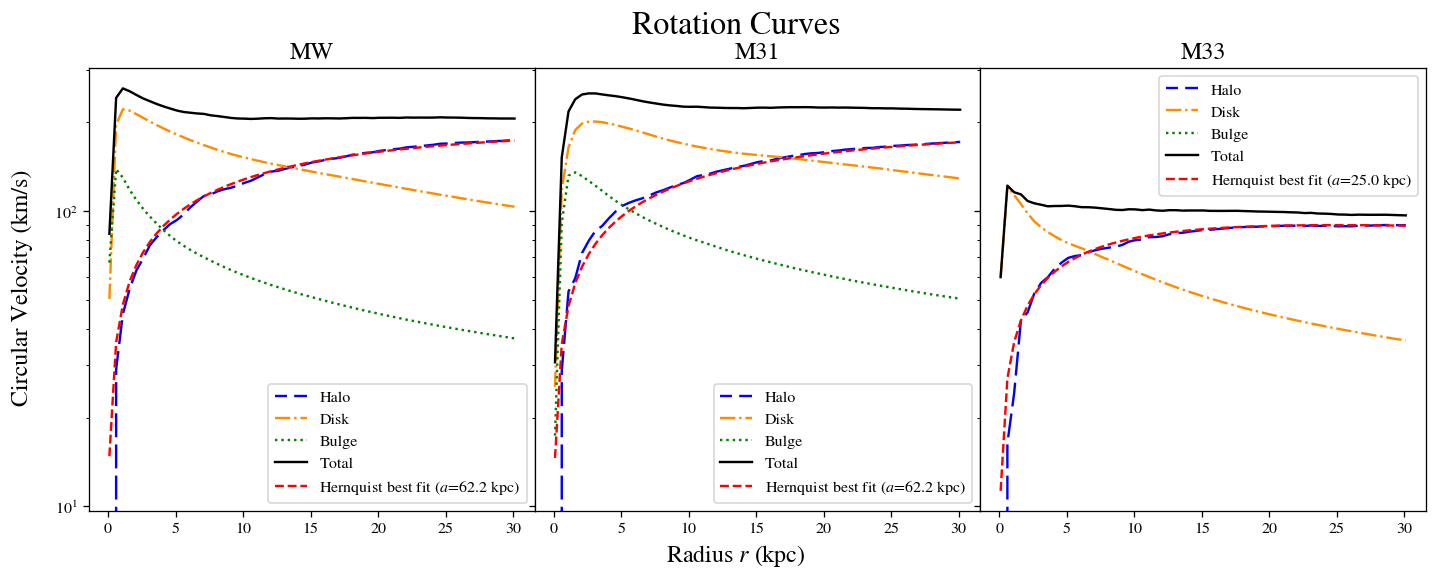

In [ ]:
# plotting rotation curves this time for each galaxy and particle type
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, 
                        figsize=(15,5))

for i in range(ngals):

    ax = axs[i]

    # halo rotation curve
    ax.semilogy(r, m_vcirc_array[i,0], c='b', 
                linestyle=(5,(10,3)), label='Halo')
    # disk rotation curve
    ax.semilogy(r, m_vcirc_array[i,1], c='darkorange', 
                linestyle='-.', label='Disk')
    # bulge rotation curve
    ax.semilogy(r, m_vcirc_array[i,2], c='g', 
                linestyle=':', label='Bulge')
    # total rotation curve
    ax.semilogy(r, m_vcirc_array[i,3], c='k', 
                label='Total')
    # best fit Hernquist rotation curve
    ax.semilogy(r, vc_hern_array[i], c='r', linestyle='--', 
                label=rf'Hernquist best fit ($a$={a_guesses[i]})')

    ax.set_title(m_profiles[i].gname, fontsize=15)
    ax.legend()

# make plots look prettier :)
fig.subplots_adjust(wspace=0)
fig.suptitle('Rotation Curves', fontsize=20)
fig.supxlabel(r'Radius $r$ (kpc)', fontsize=15)
fig.supylabel(r'Circular Velocity (km/s)', x=0.08, fontsize=15)